# K means Clustering

## 1. Import Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ("ignore")

## 2. Load Data

In [17]:
data=pd.read_csv(r"customer_segmentation.csv")
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB


In [21]:
data.describe()

,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,9597.000000,10247.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.390790,1.536427
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,3.000000
75%,465733.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [25]:
## use only numberical data
num_col=['Age', 'Work_Experience', 'Family_Size']
data=data[num_col].copy() # Since id is unique we skip that part
data.head()

,Age,Work_Experience,Family_Size
0,22,1.0,4.0
1,38,NaN,3.0
2,67,1.0,1.0
3,67,0.0,2.0
4,40,NaN,6.0


In [27]:
data.isnull().sum()

Age                   0
Work_Experience    1098
Family_Size         448
dtype: int64

In [29]:
data.shape

(10695, 3)

In [37]:
# drop null values
data=data.dropna(axis=0) # Axis=0 rows with null values will be droped 

In [39]:
data.isnull().sum()

Age                0
Work_Experience    0
Family_Size        0
dtype: int64

## 3. Scale the data:

In [52]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
data_scaled=std.fit_transform(data)  # Fit- only learn, Fit_tranform- implement these changes

In [54]:
data_scaled

array([[-1.29420836, -0.47629886,  0.75349091],
       [ 1.41867106, -0.47629886, -1.19897576],
       [ 1.41867106, -0.77173851, -0.54815354],
       ...,
       [-0.51048764, -0.47629886, -1.19897576],
       [ 0.21294687, -0.47629886,  1.40431313],
       [-0.02819797,  1.88721829,  0.10266869]])

## 4. K-means to find various values of K 

In [63]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [102]:
inertia_value=[] # store all the errors
silhoutte_score=[]
k_range=range(2,11)

In [104]:
for K in range(2,11):
    kmeans=KMeans(n_clusters=K, random_state=42)
    kmeans.fit(data_scaled)

    # Interia (within cluster sum of square: WCSS)
    inertia_value.append(kmeans.inertia_)

    # Silhoutte score
    silhoutte=silhouette_score(data_scaled, kmeans.labels_)
    silhoutte_score.append(silhoutte)
    

In [105]:
silhoutte_score

[0.2694972009523588,
 0.3543380730251246,
 0.35186036094189155,
 0.3564238777132847,
 0.36285216732331926,
 0.35808478192614307,
 0.3515340641430051,
 0.34044504989108004,
 0.34820568097637344]

In [106]:
inertia_value

[20124.07109280252,
 13014.664681611686,
 9801.312707154428,
 8531.050588815431,
 7323.934017203182,
 6309.327486234021,
 5837.2076840920045,
 5495.217968385091,
 5230.415340103139]

## 5. Elbow Method

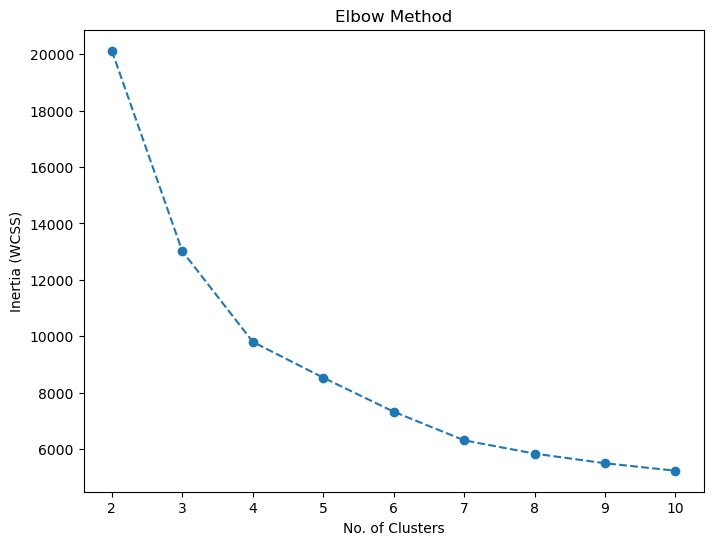

In [133]:
plt.figure(figsize=(8,6))
plt.plot(k_range, inertia_value, marker='o', linestyle='--') 
plt.xlabel("No. of Clusters")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method")
plt.show()

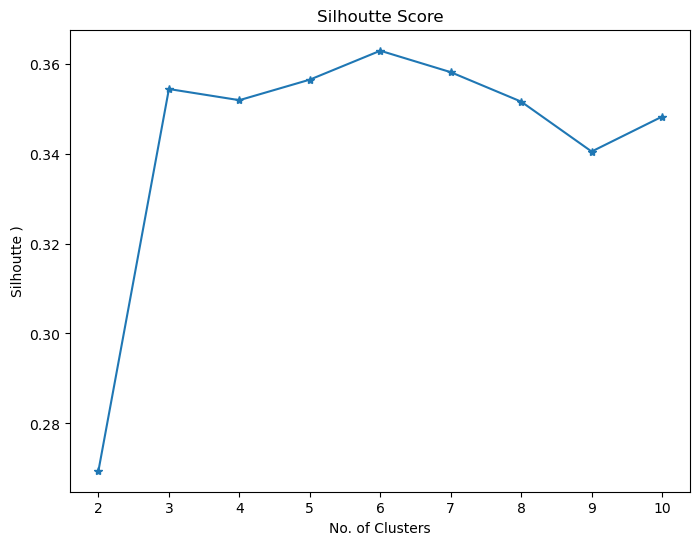

In [141]:
plt.figure(figsize=(8,6))
plt.plot(k_range, silhoutte_score, marker='*', linestyle='-') 
plt.xlabel("No. of Clusters")
plt.ylabel("Silhoutte )")
plt.title("Silhoutte Score")
plt.show()

In [145]:
print('Optimal Cluster is: K = ',4)

Optimal Cluster is: K =  4
